# 3. 신경망의 기본 구성 요소

이 장에서는 활성화 함수, 손실 함수, 옵티마이저, 지도 학습 훈련 방법 등을 소개한다. 이후 장에서 신경망을 구축하는 데 필요한 기본 요소이다.

먼저 유닛이 하나 있는 신경망인 퍼셉트론으로 시작해서 여러 가지 개념을 연결해서 나갈 것이다.

퍼셉트론은 그 자체가 복잡한 신경망의 구성 요소이다.

## 퍼셉트론 : 가장 간단한 신경망

퍼셉트론은 가자 간단한 신경망, 생물학적 뉴런을 대략 본떠 만들었다.

퍼셉트론 유닛에는 입력, 출력, 3개의 다이얼이 있는데, 이것이 바로 가중치($w$), 절편($b$), 활성화 함수($f$)이다. 가중치와 절편은 데이터에서 학습된다.

활성화 함수는 신경망과 타깃 출력을 기반으로 설계자의 직관에 따라 결정된다. 이를 수학적으로 다음과 같이 표현할 수 있다.

$$y = f(w * x + b)$$

일반적으로 퍼셉트론에는 입력을 하나 이상 사용한다. 이런 일반적인 상황을 벡터로 표현할 수 있다.

즉, $\boldsymbol {x, w}$은 벡터이고, 이 둘의 곱셈은 dot product로 바뀐다.

$$y = f(\boldsymbol {wx} + b)$$

$f$로 표시된 활성화 함수는 일반적으로 비선형 함수이다. 선형 함수는 그래프가 직선이 함수이다. 이 예시으 $\boldsymbol {wx} + b$는 선형 함수인데, 이를 아핀 변환이라고 부르기도 한다. 따라서 퍼셉트론은 **선형 함수와 비선형 함수의 조합**이다. 

그렇다면 파이토치로 퍼셉트론을 구현해보자.

In [12]:
# 파이토치로 구현한 퍼셉트론

import torch
import torch.nn as nn

class Perceptron(nn.Module):
    # 퍼셉트론은 하나의 선형 층이다.
    def __init__(self, input_dim):
        ## super()로 기반 클래스(부모 클래스)를 초기화해줌으로써, 기반 클래스의 속성을 subclass가 받아오도록 한다. (초기화를 하지 않으면, 부모 클래스의 속성을 사용할 수 없음)
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    def forward(self, x_in, apply_sigmoid = True):
        ## 매개변수 x_in는 입력 데이터 텐서이다.
        if apply_sigmoid == True:
            return torch.sigmoid(self.fc1(x_in).squeeze()) # squeeze는 차원이 1인 차원을 제거해준다.
        else:
            return self.fc1(x_in).squeeze()

## 활성화 함수

활성화 함수는 비선형 함수로, 신경망에서 데이터의 **복잡한 관계를 감지하는 데 사용**한다.

### 시그모이드

시그모이드는 임의의 실수값을 받아 0과 1 사이의 범위로 압축한다.

$$f(x) = \frac{1}{1+e^{-x}}$$

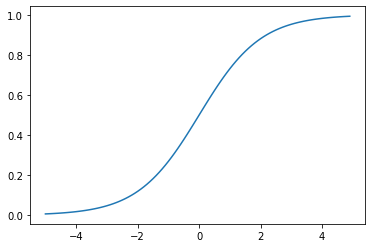

In [13]:
# 시그모이드 함수

import matplotlib.pyplot as plt
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

그래프에서 볼 수 있듯이 시그모이드 함수는 입력 범위 대부분에서 매우 빠르게 극단적인 출력을 만든다.

이로 인해 **gradient가 0이 되거나 발산하여 gradient 소실 문제, 폭주 문제를 발생** 시킬 수 있다. 이 때문에 신경망에서 시그모이드 활성화 활성화 함수는 **거의 출력층에서만 사용**한다.

### 하이퍼볼릭 탄젠트 

하이퍼볼릭 탄젠트 활성화 함수는 시그모이드 함수의 변종이다. 이 함수의 공식을 보면 잘 알 수 있다.

$$f(x) = tanh x = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

파이토치의 tanh() 함수로 그래프를 그려보면 잘 알 수 있다. 시그모이드처럼 하이퍼볼릭 탄젠트도 압축 함수이다.

다만 무한 값 범위의 실수값을 $[-1, +1]$로 바꾸는 점이 다르다.

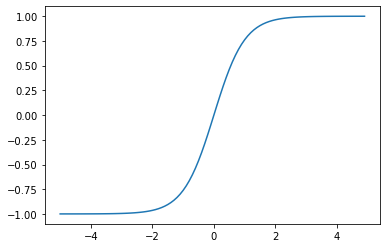

In [14]:
# 하이퍼볼릭 탄젠트 활성화 함수

x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### 렐루

렐루는 가장 중요한 활성화 함수이다. 렐루 함수는 놀랍도록 간단하지만, 혁신적이다.

$$f(x) = max(0, x)$$

렐루가 하는 일은 **음수값을 0으로 자르는 것**이다.

/var/folders/d7/8zsbg3r51rs_vl832mx18q_00000gn/T/ipykernel_28033/807957216.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


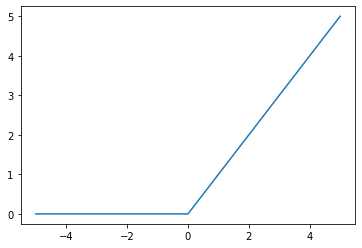

In [15]:
relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

렐루는 음수를 제거해 **그레디언트 소실 문제에 도움이 된다**. 하지만 시간이 지나서 신경망의 **특정 출력이 0이 되면 다시 돌아오지 않는다는 문제**가 있다.

이를 **죽은 렐루 문제**라고 한다.

이런 현상을 줄이기 위해 LeakyReLU나, PReLU 같은 변종이 개발되었다.

/var/folders/d7/8zsbg3r51rs_vl832mx18q_00000gn/T/ipykernel_28033/611240113.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


<function matplotlib.pyplot.show(close=None, block=None)>

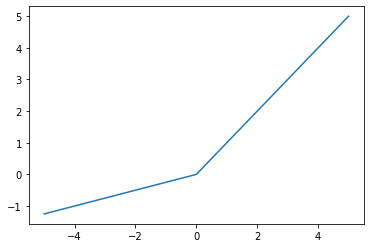

In [16]:
# PReLU

prelu = nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
## detach()는 기록을 추적하는 것을 막아준다. 
## 이런 현상이 일어나는 이유는 num_parameters의 설정 때문이다. num_parameters = 1을 설정하게 되면 prelu는 자동적으로 이 parameter을 추적하게 된다.
## num_parameters가 0이면 input channel이 0이라 오류가 뜬다. default 값은 1
## https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html 참고
## 왜 책에 detach가 없이 저렇게 코드가 나와있는지는 불명..
plt.show

### 소프트맥스

또 다른 활성화 함수는 소프트맥스이다. 소프트맥스 함수는 시그모이드 함수처럼 **유닛의 출력을 0과 1 사이로 압축**한다. 

소프트맥스 함수는 모든 출력의 합으로 각 출력을 나누어 $k$개 클래스에 대한 이산 확률 분포를 만든다.

$$softmax(x_i) = \frac{e^{x_i}}{\sum_{f=1}^{k} e^{x_f}}$$

소프트맥스 출력의 합은 1이 된다. 이는 **분류 작업의 출력을 해석하는 데 매우 유용**하다.

따라서 이 함수는 보통 확률 기반의 목적 함수인 **범주형 크로스 엔트로피**와 함께 사용한다.

In [17]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)

print(x_input, "\n", y_output, "\n", torch.sum(y_output, dim = 1))

tensor([[0.6331, 0.3816, 0.5245]]) 
 tensor([[0.3739, 0.2907, 0.3354]]) 
 tensor([1.])


### 손실 함수

손실 함수는 정답과 예측을 입력으로 받아 실숫값 점수를 만든다.

이 점수가 높을수록 **모델의 예측 성능이 나빠진다.**

파이토치는 nn 패키지 아래 손실 함수를 많이 구현해 놓았다. 가장 널리 사용하는 손실 함수 몇 개를 살펴보겠다.

### 평균 제곱 오차 손실

평균 제곱 오차는 신경망의 출력과 타깃이 연속값인 **회귀 문제**에서 가장 널리 사용하는 손실 함수이다.

$$L_{MSE}(y, \hat y) = \frac{1}{n} \sum_{i=1}^{n} (y - \hat y)^2$$

평균 제곱 오차는 **예측과 타깃값의 차이를 제곱하여 평균한 값**이다.

회귀 문제에 사용할 수 있는 다른 손실 함수는 **평균 절댓값 오차(MAE)와 평균 제곱근 오차(RMSE)**가 있다.

<font color = blue> MSE/RMSE는 scale에 따라 변동하며, MAE는 더 직관적이다. 보통 scaler 써서 RMSE륻 쓰는데, 큰 오류값에 RMSE가 패널티를 더 주기 때문에 모델의 성능을 평가하기가 더 적합하다. 제곱하면 예측값과 타깃값의 차이가 큰 것이 더 높은 손실을 얻으니까.. </font>

In [18]:
# 평균 제곱 오차 손실

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad = True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.0390, grad_fn=<MseLossBackward0>)


### 범주형 크로스 엔트로피 손실

범주형 크로스 엔트로피 손실은 일밙덕으로 출력을 클래스 소속 확률에 대한 예측으로 이해할 수 있는 다중 분류 문제에 사용한다.

타깃은 모든 클래스에 대한 다항 분포를 나타내는 원소 $n$개로 이루어진 벡터이다. 하나의 클래스만이 정답이면 이 벡터는 one-hot vector이다.

신경망의 출력도 원소 $n$개로 구성된 벡터이며 다항 분포에 대한 신경망의 예측을 나타낸다.

범주형 크로스 엔트로피는 이 타깃 $y$와 예측 $\hat y$를 비교해 손실을 계산한다.

$$ L_{crossentropy}(y, \hat y) = -\sum_i y_i log(\hat y_i) $$

이 결과는 **정답 클래스의 확률은 1에 가깝고, 다른 클래스의 확률은 0에 가까운 상태가 바람직**하다.

파이토치 함수를 제대로 사용하려면 신경망 출력 간의 관계와 손실 함수 계산 방법, 부동 소수 표현에서 생기는 일종이 계산 제약 사항을 이해해야 한다.

특히, 신경망 출력과 손실 함수 간의 미묘한 관계를 결정하는 정보가 4개가 있다.

    첫째, 수의 범위 제한이 있다.
    
    둘째, 소프트맥스 함수에 사용한 지수 함수의 입력이 음수이면 그 결과는 기하급수적으로 작은 수가 되고, 양수이면 기하급수적으로 큰 수가 된다.

    셋째, 신경망의 출력은 소프트맥스 함수를 적용하기 직전의 벡터라고 가정한다.

    넷째, 로그 함수는 지수 함수의 역함수이다.

이 4가지 정보를 기반으로 소프트맥스 함수의 핵심인 지수 함수와 크로스 엔트로피 계산에 사용되는 로그 함수를 수학적으로 간소화해서, 수치적으로 안정적인 계산을 수행하고 너무 작거나 큰 값을 피한다.

이런 간소화의 결과로 소프트맥스 함수를 사용하지 않고 신경망의 출력을 파이토치의 CrossEntropyLoss()와 함께 사용해 확률 분포를 최적화할 수 있다.

In [19]:
# 크로스 엔트로피 손실

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad = True)
targets = torch.tensor([1, 0, 3], dtype = torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

## 보통 소프트맥스 함수로 확률값을 뽑아낸 후, 그것에 Cross Entropy Error를 적용한다.

tensor(2.1156, grad_fn=<NllLossBackward0>)


### 이진 크로스 엔트로피 손실

범주형 크로스 엔트로피는 다중 클래스 분류 문제에 유용하다.

클래스 두 개를 구별하는 작업은 **이진 분류**라고 한다. 여기에는 **이진 크로스 엔트로피 손실 함수**가 효율적이다.

신경망의 출력을 가장한 랜덤 벡터에 시그모이드 활성화 함수를 적용해 이진 확률 벡터를 만든다. 마지막으로 이진 확률 벡터와 정답 벡터를 사용해 이진 크로스 엔트로피 손실을 계산한다.

In [20]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
prob = sigmoid(torch.randn(4, 1, requires_grad = True))
targets = torch.tensor([1,0,1,0], dtype = torch.float32).view(4, 1)
loss = bce_loss(prob, targets)
print(prob, "\n", loss)

tensor([[0.2608],
        [0.6903],
        [0.3737],
        [0.4355]], grad_fn=<SigmoidBackward0>) 
 tensor(1.0181, grad_fn=<BinaryCrossEntropyBackward0>)


## 지도 학습 훈련 알아보기

지도 학습은 레이블된 데이터를 주면 지정된 **타깃에 새로운 샘플을 매핑하는 방법**을 학습하는 문제이다.

특히 **모델 예측과 손실 함수를 사용**해 모델의 parameter를 gradient 기반의 방법으로 최적화하는 방법을 구체적으로 설명하겠다.

지도 학습에는 모델, 손실 함수, 훈련 데이터, 최적화 알고리즘이 필요하다. 지도 학습의 훈련 데이터는 샘플과 타깃의 쌍이다. 모델은 샘플에 대한 예측을 계산하고 손실 함수는 타깃과 비교하여 예측의 오차를 측정한다. 훈련 목표는 gradient 기반의 최적화 알고리즘으로 모델의 parameter를 조정하여 가능한 한 **낮은 손실**을 내는 것이다.

그렇다면 2차원 데이터 포인트를 클래스 두 개 중 하나로 분류하는 간단한 예제를 다루겠다.

### 예제 데이터 만들기

In [34]:
import os,sys
import numpy as np
import seaborn as sns
os.chdir('/Users/choeunsol/Python/dl_study/nlp_with_pytorch/nlp_with_pytorch_data/nlp-with-pytorch-main/chapter_3')
sys.path.append(os.pardir)

LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)

def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

In [35]:
os.getcwd()

'/Users/choeunsol/Python/dl_study/nlp_with_pytorch/nlp_with_pytorch_data/nlp-with-pytorch-main/chapter_3'

/var/folders/d7/8zsbg3r51rs_vl832mx18q_00000gn/T/ipykernel_28033/586248215.py:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)
/Users/choeunsol/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

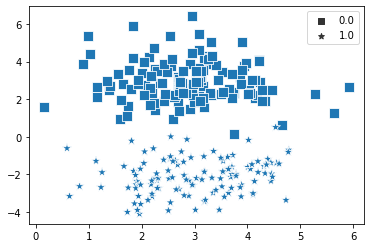

In [36]:
sample_data = get_toy_data(250)

x_sample = sample_data[0]
y_sample = sample_data[1]

x_cor = x_sample.numpy()[:, 0]
y_cor = x_sample.numpy()[:, 1]

markers = {0 : 's', 1 : '*'}

sns.scatterplot(x_cor, y_cor, style = y_sample.numpy(), markers = markers, s = 100)

### 모델 선택

여기서 사용할 모델은 퍼셉트론이다. 퍼셉트론은 어떤 크기의 입력도 다룰 수 있다. 일반적인 모델 구축 과정에서 입력 크기는 문제와 데이터에 따라 결정된다. 

클래스가 두 개 있는 이 문제를 위해 클래스에 인덱스 0과 1을 할당한다. 클래스 인덱스에 square와 *을 할당하는 순서는 자유이다.

출력 형태도 이 모델의 중요한 특징. 퍼셉트론의 활성화 함수가 시그모이드이므로 퍼셉트론의 출력은 데이터 포인트 $x$가 클래스 1일 확률, 죽 $P(y = 1|x)$이다.

### 확률을 클래스로 변환하기

이진 분류 문제에서는 결정 경계 $\boldsymbol \delta$를 적용해 확률을 두 개의 클래스로 바꾸어야 한다.

예측 확률 $P(y = 1|x) > \delta$이면 예측 클래스는 1이고, 아니면 0이다.

일반적으로 결정 경계는 0.5로 지정한다. 하지만 실전에서 만족스러운 분류 정밀도 얻으려면 **이 하이퍼파라미터를 튜닝해야 할 수 있다.**

### 손실 함수 선택

지도 학습에는 데이터를 준비하고 모델 구조를 고른 뒤 선택할 중요한 요소가 2개 더 있다.

손실 함수와 optimizer이다. 모델의 출력이 확률이라면 가장 적절한 손실 함수는 **크로스 엔트로피 기반의 손실 함수**이다.

이 예제 데이터에서는 모델이 이진 출력을 만드므로 **이진 크로스 엔트로피 손실 함수를 사용**한다.

### 옵티마이저 선택

마지막으로 선택할 요소는 옵티마이저이다. 모델이 예측을 만들고 손실 함수가 예측과 타깃 사이의 오차를 측정하면 옵티마이저가 이 오차 신호를 사용해 모델의 가중치를 업데이트한다.

가장 간단한 구조에서는 하이퍼파라미터인 학습률로 오차 신호가 가중치 업데잍에 영향을 얼마나 미치는지 조절한다. 다양한 학습률을 시도해서 결과를 비교해봐야 한다.

학습률이 크면 가중치가 크게 바뀌고 수렴에 영향을 미칠 수 있다. 학습률이 너무 작으면 훈련 진행 속도가 심하게 느려질 수 있다.

파이토치 라이브러리는 여러 종류의 옵티마이저를 제공한다. SGD는 고전적인 알고리즘이지만, 어려운 최적화 문제에서는 수렴 문제가 있어 종종 나쁜 모델을 만든다.

현재 선호하는 옵티마이저는 Adagrad나 Adam 같은 적응형 옵티마이저이다. 이런 옵티마이저는 시간에 따라 업데이트 정보를 사용한다.

Adam의 기본 학습률은 0.001이고, 논문에서 특정 값을 권장하는 상황이 아니라면 학습률 같은 하이퍼파라미터는 항상 기본값을 먼저 사용하는 것 낫다.

In [ ]:
import torch.optim as optim

input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim = input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params = perceptron.parameters(), lr = lr)

### 모두 합치기 : gradient 기반의 지도 학습

학습은 손실 계산에서 시작한다. 즉, 모델의 예측이 타깃에서 얼마나 멀리 떨어져 있는지 측정한다.

결국 손실의 gradient는 **모델 파라미터를 얼마나 많이 바꿔야 하는지를 나타내는 신호**가 된다. 각 파라미터의 gradient는 이 파라미터에 대한 손실값의 순간 변화율을 의미한다. 당연하지만 이 변화율은 **기울기**이다.

가장 간단한 형태에서 gradient 기반의 모델 훈련에는 각 파라미터에 대한 손실의 gradient로 **해당 파라미터를 반복해서 업데이트하는 작업**이 필요하다.

gradient 업데이트 알고리즘이 어떻게 동작하는지 알아보자.

    먼저 모델 객체 안에 저장된 부가 정보를 zero_grad() 함수로 초기화했다.

    그 다음 모델이 입력 데이터(x_data)에 대한 출력(y_pred)을 계산한다.

    그 다음 모델 출력(y_pred)과 기대하는 타깃(y_target)을 비교해 손실을 계산한다. 이것이 지도 학습 훈련의 지도에 해당한다.

    pytorch 손실 객체에는 backward() 메서드가 있다. 이 메서드를 사용해 계산 그래프를 거슬러 손실을 반복해서 전파하고 각 파라미터에 대한 gradient를 계산한다.

    마지막으로 옵티마이저(opt)는 step() 함수로 파라미터에 gradient를 업데이트하는 방법을 제시한다.

전체 훈련 데이터셋은 배치로 분할된다. gradient 각 단계는 배치 하나에서 수행된다.

하이퍼파리미터 batch_size는 배치 크기를 저장한다. 훈련 데이터셋은 고정되어 있으므로 배치 크기를 늘리면 배치 개수는 줄어든다.

고정 크기의 데이터셋에서 만든 여러 배치를 반복한 후 **훈련 반복은 하나의 epoch을 완료**한다. 

epoch 당 배치 개수가 데이터셋의 배치 개수와 같다면 epoch이 데이터셋에 대한 완전한 반복 한 번이 된다.

모델은 여러 epoch 동안 훈련된다. 훈련할 에포크 횟수는 고르기 쉽지 않지만, **멈출 시기를 결정하는 방법**이 있다.

지도 학습의 반복문은 중첩된다.

내부 반복문은 데이터셋 또는 배치 개수에 대해 순회하고,

외부 반복문은 지정된 epoch 횟수나 다른 종료 조건을 만족할 때까지 내부 반복문을 반복한다.

In [ ]:
import tqdm
n_epochs = 100
n_batches = 16
total_loss = 0

for epoch_i in range(n_epochs): # 지정된 에폭을 반복
    total_loss = 0
    for batch_i in range(n_batches): # 지정된 배치 개수를 반복

        # 0단계 : 데이터 가져오기
        x_data, y_target = get_toy_data(batch_size = 16)

        # 1단계 : gradient 초기화
        perceptron.zero_grad()

        # 2단계 : 모델의 정방향 계산 수행하기
        y_pred = perceptron.forward(x_data,apply_sigmoid=True)

        # 3단계 : 최적화하려는 손실 계산하기
        loss = bce_loss(y_pred, y_target)

        # 4단계 : 손실 신호를 거꾸로 전파학기
        loss.backward()

        # 5단계 : optimizer로 업데이트하기
        optimizer.step()

        # 손실 계산
        avg_loss = loss / n_batches
        total_loss += avg_loss
    print(total_loss / n_epochs)

tensor(0.0177, grad_fn=<DivBackward0>)
tensor(0.0181, grad_fn=<DivBackward0>)
tensor(0.0168, grad_fn=<DivBackward0>)
tensor(0.0169, grad_fn=<DivBackward0>)
tensor(0.0161, grad_fn=<DivBackward0>)
tensor(0.0158, grad_fn=<DivBackward0>)
tensor(0.0151, grad_fn=<DivBackward0>)
tensor(0.0141, grad_fn=<DivBackward0>)
tensor(0.0146, grad_fn=<DivBackward0>)
tensor(0.0130, grad_fn=<DivBackward0>)
tensor(0.0124, grad_fn=<DivBackward0>)
tensor(0.0139, grad_fn=<DivBackward0>)
tensor(0.0115, grad_fn=<DivBackward0>)
tensor(0.0124, grad_fn=<DivBackward0>)
tensor(0.0119, grad_fn=<DivBackward0>)
tensor(0.0121, grad_fn=<DivBackward0>)
tensor(0.0109, grad_fn=<DivBackward0>)
tensor(0.0105, grad_fn=<DivBackward0>)
tensor(0.0108, grad_fn=<DivBackward0>)
tensor(0.0103, grad_fn=<DivBackward0>)
tensor(0.0098, grad_fn=<DivBackward0>)
tensor(0.0105, grad_fn=<DivBackward0>)
tensor(0.0098, grad_fn=<DivBackward0>)
tensor(0.0095, grad_fn=<DivBackward0>)
tensor(0.0090, grad_fn=<DivBackward0>)
tensor(0.0086, grad_fn=<D

## 부가적인 훈련 개념

gradient 기반 지도 학습의 핵심 아이디어는 간단하다.

모델을 정의하고 (1), 출력을 계산한 다음(2), 손실 함수로 gradient를 계산한다(3). 그리고 최적화 알고리즘을 사용해 gradient로 model parameter를 업데이트한다 (4).

하지만 훈련 과정에 중요한 부가 개념이 몇 가지 있다. 이 절에서 그 중 일부를 다룰 것이다.

### 모델 성능 올바르게 측정하기 : 평가 지표

핵심 지도 학습 훈련 반복 이외에 가장 중요한 요소는 모델이 훈련에 사용하지 않은 데이터를 사용해 성능을 측정하는 것이다.

모델은 **평가 지표**를 하나 이상 사용해 평가된다. 가장 널리 사용하는 평가 지표는 **정확도(accuracy)**이다.

정확도는 **훈련하는 동안 만나지 못한 데이터에 대해 올바르게 예측한 비율**이다.

### 모델 성능 올바르게 측정하기 : 데이터 분할

최종 목표는 진짜 데이터 분포에 **잘 일반화시키는 것**임을 항상 기억해야 한다.

우리에게는 유한한 샘플로 이루어진 훈련 데이터만 있는데, 이는 진짜 분포의 근사 또는 불완전한 그림이다.

훈련 데이터의 샘플뿐만 아니라 **본 적없는 샘플에서도 오차를 줄일 때 일반화가 잘 된 모델**이라고 말한다.

모델이 훈련 데이터에서 손실을 낮출수록 진짜 데이터 분포에 없는 특징에 적응하여 overfit 될 수 있다.

좋은 일반화를 달성ㅘ려면 데이터셋을 랜덤하게 샘플링하여 3개(훈련 데이터셋, 검증 데이터셋, 테스트 데이터셋)로 나누거나, k-fold cross validation을 사용하는 것이 표준이다.

데이터셋을 3개로 분할했을 때 클래스 비율이 같도록 유지한다. 즉, 클래스 레이블을 기준으로 데이터셋을 분할한 다음 이를 랜덤하게 훈련, 검증, 테스트 데이터셋으로 나누는 방법이 바람직하다.

일반적인 분할 비율은 훈련 70%, 검증 15%, 테스트에 15%이다. 고정된 비율은 아니다.

때로는 훈련, 검증, 테스트 데이터셋이 미리 준비되기도 하는데, 이럴 때는 훈련 데이터만 사용해 **모델 파라미터를 업데이트**하고, 검증 데이터를 사용해 **epoch마다 모델 성능을 측정**한다. 모든 모델의 하이퍼파라미터를 선택하고 난 후 마지막 결과를 출력할 때 테스트 데이터를 딱 한 번 사용한다.

마지막 단계가 매우 중요하다. 테스트 데이터셋으로 모델의 성능을 더 많이 측정할수록 머신러닝 엔지니어는 테스트 세트에서 좋은 성능을 내는 하이퍼파라미터를 선택하게 되기 때문이다. 이렇게 되면 더 많은 데이터를 수지하지 않고서는 본 적 없는 데이터에서 모델이 얼마나 잘 동작할지 알 수 없다.

k-fold cross validation을 사용한 모델 평가는 훈련, 검증, 테스트 분할을 사용한 평가와 매우 비슷하다.

하지만 먼저 **데이터셋을 같은 크기의 fold k개**로 나눈다. 폴드 하나를 평가에, 나머지 k-1개를 훈련에 사용한다. 그리고 이 평가에 사용할 fold를 바꿔가며 이 과정을 반복한다,

fold가 k개 있으므로 모든 폴드에 평가 폴드가 될 기호ㅚ가 있으며 k개의 정확도 값을 만든다. 최종 정확도는 간단하게 평균과 표준 편차를 계산한다.

k-fold cross validation은 계산 비용이 많이 들지만 **작은 데이터셋에는 매우 유용**하다.

### 훈련 중지 시점 파악하기

앞의 예제는 고정된 epoch 횟수만큼 모델을 훈련한다. 간단한 방법이지만 임의적이고 필수도 아니다.

올바른 모델 성능을 측정하는 이유는 이 값을 사용해 훈련을 멈출 때를 결정하기 위해서이다. 가장 널리 사용하는 방법은 **조기 종료**이다.

조기 종료는 epoch마다 검증 데이터셋에 대한 성능을 기록하고 **이 성능이 더는 좋아지지 않을 때를 감지**한다. 그 다음 성능이 계속 좋아지지 않으면 훈현을 종료한다.

훈련을 종료하기 전에 기다리는 epoch 횟수는 인내(patience)라고 부른다. 일반적으로 모델이 어떤 데이터셋에서 개선되지 않는 지점을 **모델이 수렴된 곳**이라고 한다.

실전에서 모델이 완전히 수렴되도록 기다리는 일은 드물다.

### 최적의 하이퍼파리미터 찾기

optimizer는 미니배치라는 일부 훈련 데이터로 parameter 또는 가중치의 실숫값을 조정한다고 배웠다.

하이퍼파라미터는 모델의 파라미터 개수와 값에 영향을 미치는 모든 모델 설정이다.

모델 훈련 방식을 결정하는 선택 옵션이 많다. 여기에는 **손실 함수, optimizer, learning rate, 층 크기, 조기 종료하기 전에 인내할 epoch 수, 다양한 규제 방법** 등이 포함된다.

이런 선택이 모델의 수렴과 성능에 큰 영향을 미칠 수 있다는 점을 염두에 두고 여러 선택 옵션을 체계적으로 테스트해야 한다.

### 규제

규재는 딥러닝에서 가장 중요한 개념이다. 규제라는 개념은 수치 최적화 이론에서 유래했다.

대부분의 머신러닝 알고리즘은 손실 함수를 최적화해서 샘플을 가장 잘 설명하는 parameter 값을 찾는다. 대부분의 데이터셋과 작업에서 이런 최적화 문제에 적용할 수 있는 여러 솔루션이 있다.

그럼 우리는 무엇을 선택해야 할까? 여기에 대한 대답이 바로 **규제**이다.

머신러닝에서 데이터 포인트를 지나가면서 더 부드럽게 만드는 제약을 **L2 규제**라고 한다. pytorch에서는 optimizer의 weight_decay로 부드러운 수준을 조절할 수 있다. weight_decay 값이 클수록 **optimizer는 부드러운 모델을 선택**한다.

**L1 규제**는 주로 희소한 solution을 만드는 데 사용한다. 즉 대부분의 model parameter가 0에 가깝다. 4장에서는 구조적인 규제 방법인 **dropout**을 설명할 것이다.

<font color = blue> 두 규제는 모두 과적합을 방지하기 위해 사용한다. 규제항은 테스트 데이터셋 적합을 위해 편향을 감수하고 분산을 줄여주는 역할을 한다. 통상적으로 L1 규제는 변수 선택의 효과가 있어 모델의 parameter가 많지만 중요한 특징은 얼마 없다고 여겨졌을때 (즉 변수들 간의 상관성이 있을 때) 사용하고, L2 규제는 L1 규제에 비해 smooth하게 변수를 선택해준다. </font>

## 예제 : 레스토랑 리뷰 감성 분류하기

이번 절에서는 작은 합성 데이터를 사용해 지도 학습 훈련을 자세히 알아보고 중요한 기본 개념을 설명했다. 여기에서는 실전 데이터셋과 문제를 다룰 것이다.

퍼셉트론과 지도 학습 훈련 방법을 사용해 Yelp의 레스토랑 리뷰가 긍정적인지 부정적인지 분류하는 작업이다.

우선 작은 데이터셋을 훈련, 검증, 테스트용 데이터셋 3개로 나눈다. 원본 데이터셋은 2개로 나뉘지만 검증 세트를 준비하는 것이 중요하다.

머신러닝에서는 훈련 세트로 모델을 훈련하고 **따로 떼어 놓은 검증 세트로 모델이 얼마나 잘 동작하는지 평가**한다. 검증 세트를 기반으로 모델을 선택하면 불가피하게 모델이 **검증 세트에 더 잘 수행되도록 편향**된다. 모델이 점차 개선되는 지 측정해야 하므로 가능한 한 평가에 적게 사용할 세 번재 세트를 준비해서 이 문제를 해결할 수 있다.

요약하면 **모델의 parameter을 추정하는 데에는 훈련 세트를 사용**하고, **하이퍼파라미터를 선택하는 데 검증 세트를 사용**한다. 테스트 세트는 **마지막 평가와 보고에 사용**된다.

In [37]:
# 데이터 불러오기
import os, sys
import collections
import numpy as np
import pandas as pd
import re
from argparse import Namespace

os.chdir('/Users/choeunsol/Python/dl_study/nlp_with_pytorch/nlp_with_pytorch_data/nlp-with-pytorch-main/chapter_3')

args = Namespace(
    raw_train_dataset_csv="raw_train.csv",
    raw_test_dataset_csv="raw_test.csv",
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion = 0.15,
    output_munged_csv="data/yelp/reviews_with_splits_full.csv",
    seed=1337
)

# 원본 데이터를 읽습니다
train_reviews = pd.read_csv(args.raw_train_dataset_csv, header=None, names=['rating', 'review'])
train_reviews = train_reviews[~pd.isnull(train_reviews.review)]
test_reviews = pd.read_csv(args.raw_test_dataset_csv, header=None, names=['rating', 'review'])
test_reviews = test_reviews[~pd.isnull(test_reviews.review)]

# 고유 클래스
set(train_reviews.rating)

{1, 2}

In [38]:
# 별점 기준으로 나누어 train test split

by_rating = collections.defaultdict(list)
for _, row in train_reviews.iterrows():
    by_rating[row.rating].append(row.to_dict())

In [39]:
# 분할 데이터를 만듭니다.
final_list = []
np.random.seed(args.seed)

for _, item_list in sorted(by_rating.items()):

    np.random.shuffle(item_list)
    
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    
    # 데이터 포인터에 분할 속성을 추가합니다
    for item in item_list[:n_train]:
        item['split'] = 'train'
    
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'

    # 최종 리스트에 추가합니다
    final_list.extend(item_list)

In [40]:
for _, row in test_reviews.iterrows():
    row_dict = row.to_dict()
    row_dict['split'] = 'test'
    final_list.append(row_dict)

In [41]:
# 분할 데이터를 데이터 프레임으로 만듭니다
final_reviews = pd.DataFrame(final_list)

In [42]:
# 최소한의 데이터 정제 작업

def preprocess_text(text):
    if type(text) == float:
        print(text)
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text

final_reviews.review = final_reviews.review.apply(preprocess_text)

#### Vocabulary

텍스트를 벡터의 미니배치로 바꾸는 첫 번째 단계는 **토큰을 정수로 매핑하기**이다. 토큰과 정수 사이를 일대일 매핑하는 방법이 표준이다.

파이썬에서는 딕셔너리 두 개를 사용하면 간단하다.

    두 딕셔너리를 Vocabulary 클래스에 캡슐화한다.

    Vocabulary 클래스는 딕셔너리에 사용자가 토큰을 추가하면 자동으로 인덱스를 증가시키고 UNK라는 특별 토큰도 관리한다. UNK 토큰을 사용하면 테스트할 때 훈련에서 본 적이 없는 토큰을 처리할 수 있다.

    Vectorizer 클래스에서 보겠지만 Vocabulary에서 자주 등장하지 않는 토큰을 제한할 것이다. 이런 토큰이 훈련 과정에서 UNK 토큰으로 나타난다. 이는 Vocabulary 클래스가 사용하는 메모리를 제한하는 데 필수적이다.

    Vocabulary에 새로운 토큰을 추가하기 위해 add_token()을 호출한다.

    토큰에 해당하는 인덱스를 추출할 때는 lookup_token()을 호출한다.

    특정 인덱스에 해당하는 토큰을 추출할 때는 lookup_index()을 호출한다.    

In [43]:
# Class Method

from argparse import Namespace
from collections import Counter
import json
import os
import re
import string

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import tqdm

class Vocabulary(object):
    """ 매핑을 위해 텍스트를 처리하고 어휘 사전을 만드는 클래스 """

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        """
        매개변수:
            token_to_idx (dict): 기존 토큰-인덱스 매핑 딕셔너리
            add_unk (bool): UNK 토큰을 추가할지 지정하는 플래그
            unk_token (str): Vocabulary에 추가할 UNK 토큰
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
        self._add_unk = add_unk
        self._unk_token = unk_token
        
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
        
        
    def to_serializable(self):
        """ 직렬화할 수 있는 딕셔너리를 반환합니다 """
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}

    @classmethod
    # @classmethod는 클래스에서 직접 호출을 가능하게 한다.
    ## class에서 바로 접근할 때(Vocabulary.from_serialize()) 앞의 인자(cls)를 빼고 접근할 수 있다.
    ## 비슷한 정적 메서드 @staticmethod는 부모 인자(여기서는 Vocabulary)의 요소를 가져오지만, @classmethod는 입력한 클래스의 요소를 가져 올 수 있다.
    ## 즉 다른 class A가 Vocabulary를 인자로 쓴다면 여기서는 A의 contents를 가져오다는 것.
    def from_serializable(cls, contents):
        """ 직렬화된 딕셔너리에서 Vocabulary 객체를 만듭니다 """
        return cls(**contents)

    # 새로운 토큰을 추가하기 위한 함수
    def add_token(self, token):
        """ 토큰을 기반으로 매핑 딕셔너리를 업데이트합니다

        매개변수:
            token (str): Vocabulary에 추가할 토큰
        반환값:
            index (int): 토큰에 상응하는 정수
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    
    def add_many(self, tokens):
        """ 토큰 리스트를 Vocabulary에 추가합니다.
        
        매개변수:
            tokens (list): 문자열 토큰 리스트
        반환값:
            indices (list): 토큰 리스트에 상응되는 인덱스 리스트
        """
        return [self.add_token(token) for token in tokens]

    # 토큰에 해당하는 인덱스를 추출
    def lookup_token(self, token):
        """ 토큰에 대응하는 인덱스를 추출합니다.
        토큰이 없으면 UNK 인덱스를 반환합니다.
        
        매개변수:
            token (str): 찾을 토큰 
        반환값:
            index (int): 토큰에 해당하는 인덱스
        노트:
            UNK 토큰을 사용하려면 (Vocabulary에 추가하기 위해)
            `unk_index`가 0보다 커야 합니다.
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        # unk_index는 unknown을 add_token으로 unknown token을 추가한 인덱스이므로 unk_index가 존재하면 이 값으로 변환해서 반환한다.
        else:
            return self._token_to_idx[token]

    
    # 인덱스에 해당하는 토큰을 추출
    def lookup_index(self, index):
        """ 인덱스에 해당하는 토큰을 반환합니다.
        
        매개변수: 
            index (int): 찾을 인덱스
        반환값:
            token (str): 인텍스에 해당하는 토큰
        에러:
            KeyError: 인덱스가 Vocabulary에 없을 때 발생합니다.
        """
        if index not in self._idx_to_token:
            raise KeyError("Vocabulary에 인덱스(%d)가 없습니다." % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

#### Vectorizer

텍스트 데이터를 벡터의 미니배치로 바꾸는 두 번째 단계는 입력 데이터 포인트의 토큰을 순회하면서 각 토큰을 정수로 바꾸는 것이다.

이 반복 과정의 결과는 벡터이다. 이 벡터가 다른 데이터 포인트에서 만든 벡터와 합쳐지므로 **Vectorizer에서 만든 벡터는 항상 길이가 같아야 한다**.

이를 위해 Vectorizer 클래스는 리뷰의 단어를 정수로 매핑한 Vocabulary로 캡슐화한다.



Vectorizer 클래스는 @classmethod를 사용해 from_dataframe() 메서드가 Vectorizer 클래스를 초기화하는 진입점임을 나타낸다.

from_dataframe() 메서드는 pandas 데이터프레임을 순회하면서 두 가지 작업을 수행한다.

    첫 번째 작업은 데이터셋에 있는 모든 토큰의 빈도수를 카운트한다.

    두 번째 작업은 키워드 매개변수 cutoff에 저장한 수보다 빈도가 높은 토큰만 사용하는 Vocabulary 객체를 만든다. 이 메서드는 최소한 cutoff 횟수보다 많이 등장하는 단어를 모두 찾아 Vocabulary 객체에 추가한다.

    UNK 토큰도 Vocabulary에 추가하므로 Vocabulary의 lookup_token() 메서드를 호출할 때 포함되지 않은 단어는 모두 unk_index를 반환한다.

    vectorize() 메서드는 Vectorizer 클래스의 핵심 기능을 캡슐화한다. 이 메서드는 매개 변수로 리뷰 문자열을 받고 이 리뷰의 벡터 표현을 반환한다. 결과물은 Vocabulary의 크기와 길이가 같고 one-hot encoding된 이진 벡터.

이 표현은 몇 가지 제약이 있다.

첫 번째, 희소한 배열이다. 한 리뷰의 고유 단어 수는 항상 Vocabulary의 전체 단어 수보다 훨씬 작다.

두 번째, 리뷰에 등장하는 단어 순서를 무시한다.

### ReviewVectorizer 코드

In [44]:
class ReviewVectorizer(object):
    """ 어휘 사전을 생성하고 관리합니다 """
    def __init__(self, review_vocab, rating_vocab):
        """
        매개변수:
            review_vocab (Vocabulary): 단어를 정수에 매핑하는 Vocabulary
            rating_vocab (Vocabulary): 클래스 레이블을 정수에 매핑하는 Vocabulary
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab

    def vectorize(self, review):
        """ 리뷰에 대한 원-핫 벡터를 만듭니다
        
        매개변수:
            review (str): 리뷰
        반환값:
            one_hot (np.ndarray): 원-핫 벡터
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1

        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """ 데이터셋 데이터프레임에서 Vectorizer 객체를 만듭니다
        
        매개변수:
            review_df (pandas.DataFrame): 리뷰 데이터셋
            cutoff (int): 빈도 기반 필터링 설정값
        반환값:
            ReviewVectorizer 객체
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        
        # 점수를 추가합니다
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)

        # count > cutoff인 단어를 추가합니다
        word_counts = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
               
        for word, count in word_counts.items():
            if count > cutoff:
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cls, contents):
        """ 직렬화된 딕셔너리에서 ReviewVectorizer 객체를 만듭니다
        
        매개변수:
            contents (dict): 직렬화된 딕셔너리
        반환값:
            ReviewVectorizer 클래스 객체
        """
        review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
        rating_vocab = Vocabulary.from_serializable(contents['rating_vocab'])

        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        """ 캐싱을 위해 직렬화된 딕셔너리를 만듭니다
        
        반환값:
            contents (dict): 직렬화된 딕셔너리
        """
        return {'review_vocab': self.review_vocab.to_serializable(),
                'rating_vocab': self.rating_vocab.to_serializable()}

### 파이토치 데이터셋 이해하기

가정
- ReviewDataset 클래스는 데이터셋이 최소한으로 정제되고 3개로 나뉘었다고 가정
- 리뷰를 공백을 기준으로 나눠서 토큰 리스트를 얻을 수 있다.
- 샘플이 훈련, 검증, 테스트 중 어느 세트에 있는지 표시되었다고 가정

파이토치는 Dataset 클래스로 데이터셋을 추상화한다. Dataset 클래스는 추상화된 반복자이다.

파이토치에서 새로운 데이터셋을 사용할 때는 **먼저 Dataset 클래스를 상속하여 __getitem__()와 __len__() 메서드를 구현**해야 한다.

이 예에서는 Dataset 클래스를 상속하여 ReviewDataset 클래스를 만들고 __getitem__()와 __len__() 메서드를 구현한다. ReviewDataset 클래스 안에서 예제 데이터셋과 함께 다양한 파이토치 유틸리티를 사용한다.

이런 유틸리티 중 하나인 DataLoader를 다음 절에서 다루는데, 이 클래스는 ReviewVectorizer 클래스에 크게 의존한다.

    ReviewVectorizer는 리뷰 텍스트를 수치 벡터로 변환하는 클래스라고 생각하면 된다. 

**벡터화 단계를 거쳐야 신경망이 텍스트 데이터를 다룰 수 있다**.

전체적인 설계는 데이터 포인트 하나에 벡터화 로직을 적용하는 데이터셋 클래스를 구현하는 것이다.

그 다음 파이토치 DataLoader 클래스가 데이터셋에서 샘플링하고 모아서 미니배치를 만든다.

In [54]:
# 엘프 리뷰 데이터를 위한 파이토치 데이터셋 클래스

from torch.utils.data import Dataset

class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        # review_df는 데이터셋, vectorizer는 ReviewVectorizer 객체
        self.review_df = review_df
        self._vectorizer = vectorizer # 앞의 언더 바 한 개는 이 함수(vectorizer은 함수이니)를 이 모듈 내에서만 사용한다는 뜻이다.
        
        self.train_df = self.review_df[self.review_df.split == 'train']
        self.train_size = len(self.train_df)
        
        self.val_df = self.review_df[self.review_df.split == 'val'] 
        self.validation_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split == 'test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train' : (self.train_df, self.train_size),
                             'val' : (self.val_df, self.validation_size),
                             'test' : (self.test_df, self.test_size)}

        self.set_split('train')

    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv): # 인스턴스가 아닌 클래스를 선언
        # 데이터셋을 로드하고 새로운 ReviewVectorizer 객체를 만든다.
        # reciew_csv : 데이터셋의 위치, 반환값 : ReviewDataset의 인스턴스
        review_df = pd.read_csv(review_csv)
        return cls(review_df, ReviewVectorizer.from_dataframe(review_df))
    
    def get_vectorizer(self):
        return self._vectorizer

    def set_split(self, split = 'train'): # 데이터프레임에 있는 열을 사용해 분할 세트를 선택한다.
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]
    
    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        # 파이토치 데이터셋의 주요 진입 메서드
        ## index(int) : 데이터 포인트의 인덱스
        ## 반환값 : 데이터 포인트의 특성(x_data)과 레이블(y_target)로 이루어진 딕셔너리
        row = self._target_df.iloc[index]
        review_vector = self._vectorizer.vectorize(row.review)
        rating_index = self._vectorizer.rating_vocab.lookup_token(row.rating)
        return {'x_data' : review_vector, 'y_target' : rating_index}
    
    def get_num_batches(self, batch_size):
        # 배치 크기가 주어지면 데이터셋으로 만들 수 있는 배치 개수를 반환한다.
        ## 매개변수 : batch_size (int)
        ## 반환값 : 배치 개수
        return len(self) // batch_size

### Vocabulary, Vectorizer, DataLoader 클래스

<font color = red> 코드 구현을 위해 class들을 앞으로 빼놨음!! </font>

텍스트 입력을 벡터의 미니 배치로 바꾸는 프로세스이다. 이 파이프라인은 전처리된 텍스트를 사용하며, 각 데이터 포인트는 토큰의 집합이다.

이어지는 절에 등장하는 새로운 클래스는 각 토큰을 정수에 매핑하고, 이 매핑을 **각 데이터 포인트에 적용해 벡터 형태로 변환**한다. 그 다음 벡터로 변환한 데이터 포인트를 모델을 위해 **미니배치로 모은다**.

### DataLoader

텍스트를 벡터로 변환하는 미니배치 파이프라인의 마지막 단계는 벡터로 변환한 데이터 포인트 모으기이다.

파이토치 내장클래스인 DataLoader는 신경망 훈련에 필수인 미니배치로 모으는 작업을 편하게 해준다. DataLoader 클래스는 파이토치 Dataset(이 예에서는 앞서 정의한 ReviewDataset), batch_size 및 몇 가지 편리한 키워드를 매개변수로 받는다.

이 클래스의 객체는 Dataset 클래스가 제공한 데이터 포인트를 순회하는 파이썬 반복자이다.

In [46]:
from torch.utils.data import DataLoader

def generate_batches(dataset, batch_size, shuffle = True, drop_last = True, device = 'cpu'):
    # 파이토치 DataLoader를 감싸는 제너레이터 함수
    # 각 텐서를 지정된 장치로 이동한다.
    dataloader = DataLoader(dataset=dataset, batch_size = batch_size, shuffle = shuffle, drop_last = drop_last)
    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

### 퍼셉트론 분류기

이제는 Perceptron 분류기를 적용해보자. 단일 출력을 만드는 Linear 층을 생성하고, 비선형 활성화 함수로 Sigmoid를 이용한다.

forward()에는 선택적으로 시그모이드 함수를 적용하는 매개변수가 있는데, 이진 분류 문제에서는 **이진 크로스 엔트로피 손실**이 가장 적절한 손실 함수이다.

하지만 시그모이드와 손실 함수를 함께 사용할 때는 수치 안정성 이슈가 있다.

파이토치는 **시그모이드 없이 간편하게 사용할 수 있고 수치적으로 안정된 계산**을 위한 BCEWithLogitsLoss()를 제공한다. 이 손실 함수를 사용하려면 **출력에 시그모이드 함수를 적용해서는 안 된다**. 따라서 forward() 메서드의 기본값은 시그모이드를 적용하지 않는다.

In [47]:
import torch.nn as nn

class ReviewClassifier(nn.Module):
    def __init__(self, num_features): # num_features : 입력 특성 벡터의 크기
        super(ReviewClassifier, self).__init__() # 파이토치에서 super 생성자는 필수적이다. 불러주지 않을 경우 __init__이 수행되지 않는다.
        self.fc1 = nn.Linear(in_features=num_features, out_features=1)
    def forward(self, x_in, apply_sigmoid = False):
        y_out = self.fc1(x_in).squeeze()
        if apply_sigmoid:
            y_out = torch.sigmoid(y_out)
        return y_out

### 모델 훈련

여기서는 고수준의 결정을 조정하기 편하도록 모든 결정 요소를 관리하는 args 객체를 사용한다.

In [48]:
from argparse import Namespace

args = Namespace(
    frequency_cutoff = 25,
    model_state_file = '/Users/choeunsol/Python/dl_study/nlp_with_pytorch/nlp_with_pytorch_data/nlp-with-pytorch-main/chapter_3/model_storage',
    review_csv = '/Users/choeunsol/Python/dl_study/nlp_with_pytorch/nlp_with_pytorch_data/nlp-with-pytorch-main/chapter_3/reviews_with_splits_lite.csv',
    save_dir = '/Users/choeunsol/Python/dl_study/nlp_with_pytorch/nlp_with_pytorch_data/nlp-with-pytorch-main/chapter_3/model_storage',
    vectorizer_file = 'vectorizer.json',
    batch_size = 128,
    early_stopping_criteria = 5,
    learning_rate = 0.001,
    num_epochs = 100,
    seed = 1337
)


훈련 과정 정보를 담은 작은 딕셔너리인 train_state를 설명한다. 모델을 훈련하면서 추적할 정보가 늘어날수록 이 딕셔너리가 커진다. 이는 모델 훈련 과정에서 추적할 기본 정보만 담는다.

모델 자체, 데이터셋, 옵티마이저, 손실 함수가 포함된다.

#### 훈련 준비

아래 코드에서 담을 요소를 설명한다.

첫 번째 요소는 훈련 상태를 초기화하는 함수이다. epoch index, 훈련 손실 리스트, 훈련 정확도, 검증 손실, 검증 정확도를 포함한다. 또한 테스트 손실과 테스트 정확도를 포함한다.

두 번째는 데이터셋과 모델을 만든다. 데이터셋 클래스에서 Vectorizer을 만든다. GPU 장치를 사용할 수 있는지 확인하여 지정된 장치로 이동한다. **데이터와 모델이 같은 장치**에 있어야 하므로 훈련 반복 안에서 호출되는 generate_batches() 함수에서 이 장치를 사용한다.

마지막은 손실 함수와 옵티마이저이다. 여기에서는 손실 함수로 BCEWithLogitsLoss()를 사용한다. optimizer는 Adam을 사용한다.

In [68]:
import torch
import torch.optim as optim

def make_train_state(args):
    return {
        'epoch_index' : 0,
        'train_loss' : [],
        'train_acc' : [],
        'val_loss' : [],
        'val_acc' :[],
        'test_loss' : -1,
        'test_acc' : -1
    }
train_state = make_train_state(args)

if not torch.cuda.is_available():
    args.cuba = False
    args.device = torch.device('cuda' if args.cuba else 'cpu')

    # 데아터셋과 Vectorizer
    dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv) # 클래스로부터 직접 호출
    vectorizer = dataset.get_vectorizer()

    # 모델
    classifier = ReviewClassifier(num_features = len(vectorizer.review_vocab))
    classifier = classifier.to(args.device)

#### 훈련 반복

훈련 반복은 초기화한 개겣를 사용해 모델의 성능이 높아지도록 모델 파라미터를 업데이트한다.

내부 반복문은 **데이터셋의 미니배치에 대해서 반복을 수행**하고, 외부 반복문은 내부 반복문을 여러 번 반복한다.

In [103]:
optimizer = optim.Adam(classifier.parameters(), lr = args.learning_rate)
loss_function = nn.BCEWithLogitsLoss()

from sklearn.metrics import accuracy_score

for epoch_index in range(args.num_epochs):
    train_state['epoch_index'] = epoch_index

# 훈련 세트 순회
# 훈련 세트와 batch generator 준비, 손실과 정확도를 0으로 설정
    dataset.set_split('train')
    batch_generator = generate_batches(dataset, batch_size = args.batch_size, device = args.device)
    running_loss = 0.0
    running_acc =0.0
    classifier.train()
    for batch_index, batch_dict in enumerate(batch_generator):
        # 1단계 : gradient 0으로 초기화
        optimizer.zero_grad()

        # 2단계 : 출력 계산
        y_pred = classifier(x_in = batch_dict['x_data'].float())

        # 3단계 : 손실 계산
        loss_value = loss_function(y_pred.detach().numpy(), batch_dict['y_target'].float())
        loss_batch = loss.item()
        running_loss += (loss_batch - running_loss) / (batch_index + 1)

        # 4단계 : gradient 계산
        loss.backward()

        # 5단계 : optimizer로 가중치를 업데이트
        optimizer.step()

        # 정확도 계산
        acc_batch =accuracy_score(y_pred, batch_dict['y_target'])
        running_acc += (acc_batch - running_acc) / (batch_index + 1)

    train_state['train_loss'].append(running_loss)
    train_state['train_acc'].append(running_acc)

TypeError: 'int' object is not callable

#### 메모

<font color = blue> 1. 자연어 처리에 대한 기반 지식 없이 이 책의 예제 코드를 구현하고 이해하는 것은 상당한 시간이 소요되고, 그 투자 비용 대비 성과도 안 나올 것 같음. </font>
- 책이 나쁘다는 것이 아니라 토큰화 같은 개념들에 대해 익숙하지 않으면 직접 구현하지 못하는 코드가 대다수

- 이 코드에 대한 설명도 나같은 입문자한테 절대 친절하지 않음. 이해하지 못하는 코드를 본 결과 그냥 코드보면서 구글링하는 게 훨씬 효율적임.

- Vectorizer, Vocabulary에 대해서 2일 동안 머리 싸매고 고민해봤으나 다음 날되면 리셋. 체화가 아예 안됨. 내 머리가 나빠서일수도

- 자연어 전처리에 대한 이해가 전제되어야 체화 가능할 것 같음. 위와 마찬가지로 내 머리가 나빠서일수도

- 책이 문제라고 하기에는 어느 정도 배경 지식이 있는 앞 부분은 또 잘 읽히는 거 보면 아닌 거 같고, 그냥 내가 자연어에 대한 이해가 부족하다고 생각


<font color = blue> 2. 책에 불만인 부분 </font>

- 최소한 책에 써놓은 코드는 돌아가게 해야 할 거 아닌가.

- 앞 부분도 Vocabulary랑 Vectorizer를 하위 클래스로 쓰는 ReviewVectorize 클래스가 앞에 나오고, 그 뒤에 Vocabulay, Vectorizer가 나온다. 이거 코드 돌아가게 하려면 학습자가 임의대로 순서 조정하거나 깃허브에서 코드 복사해서 넣어야 하는데 코드를 직접 치면서 구현 공부하는 나로서는 매우 불만인 사항이었다.

- 신경망 돌리는 부분도 loss_func만 딸랑 써놓고 앞에서 nn.BCEWithLogitsLoss() 쓰라고 해서 손실 함수로 넣었더니 "int object is not callable" 이 문제만 계속 반복된다. 안 돌아가는 건 문제가 안 된다. 내가 뭐 잘못 넣었겠지. 근데 돌아가는 깃허브 코드에는 옵션들이 잔뜩 적혀 있어서 이걸 또 뜯어보면서 공부해야 한다. 결국 내가 코드 구현하는 지분이 현저히 낮고, 책이 제시하는 코드도 제대로 안 돌아간다(앞 장에서도 detach().numpy()와 같은 문제가 떴던 것처럼). 책 만으로도 공부가 됐으면 좋겠는데 큰 바람은 아니지 않나 싶다.


<font color = blue> 3. 이걸로 공부를 한다면 할 거 같은데, 이론 부분은 빈약하고 예제 코드 중심이기 때문에 예제 코드 이해 못하면 그냥 안 하느니 못한 것 같다. </font>

<font color = blue> 4. 벌금보다 이거 꾸역꾸역하면서 받은 스트레스 대비 성장한다는 느낌이 전혀 없어서 포기합니다 ㅠ </font>